In [1]:
%matplotlib notebook

In [2]:
import io
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

In [6]:
def fit_the_plot(x, y):
    """
    Fit y(x) to y = A + B * x ** C. Returns np.array([A, B, C]).
    """
    # At first fit the log(y) = log(B) + C * log(x)
    lincoef, _, _, _ = np.linalg.lstsq(np.vstack((np.ones_like(x), np.log(x))).T, np.log(y), rcond=None)
    
    # Then fit the y = A + B * x ** C
    coef0 = np.array([0, np.exp(lincoef[0]), lincoef[1]])
    res = scipy.optimize.least_squares(lambda coef: (coef[0] + coef[1] * x ** coef[2]) / y - 1,
                                       coef0, method='lm')
    return res.x


def plot_me(data, maximum, title=None):
    coef = fit_the_plot(data[:, 0], data[:, 1])
    x = np.logspace(np.log10(min(data[:, 0])), np.log10(maximum))
    y = coef[0] + coef[1] * x ** coef[2]

    plt.figure()
    plt.title(title)
    plt.scatter(data[:, 0], data[:, 1] / 3600, color='C0')
    plt.plot(x, y / 3600, color='C1')
    plt.gca().set(xlabel='number of objects', xscale='log',
                  ylabel='time in hours', yscale='log')
    plt.grid(which='both')

<IPython.core.display.Javascript object>


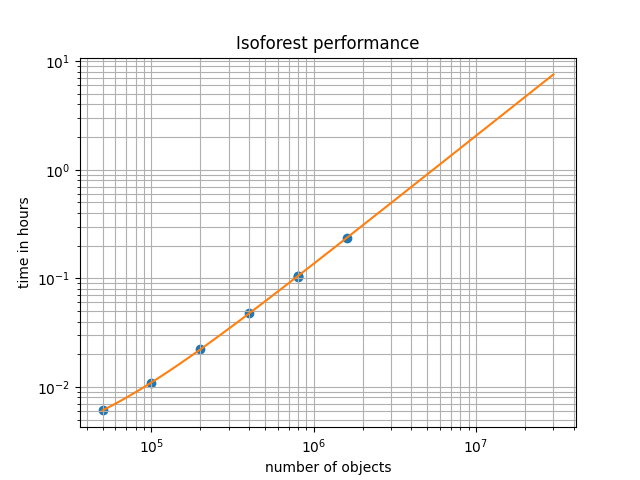

In [7]:
iso_file = io.StringIO(
             """
             50000,22
             100000,39
             200000,80
             400000,174
             800000,374
             800000,378
             800000,379
             1600000,853
             """)

iso_data = np.genfromtxt(iso_file, delimiter=',')
plot_me(iso_data, 30e6, title='Isoforest performance')

<IPython.core.display.Javascript object>


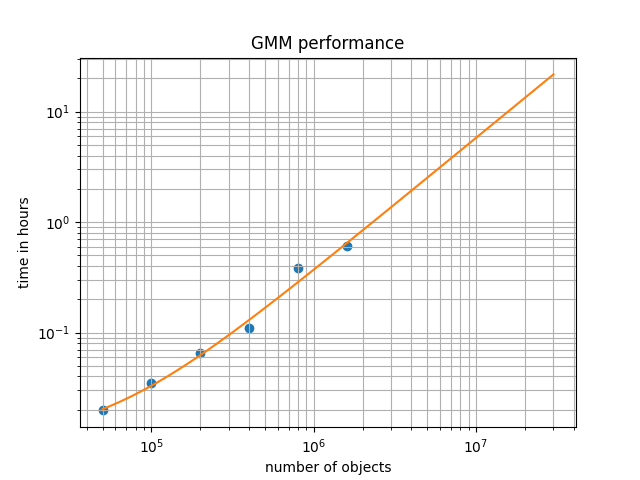

In [8]:
gmm_file = io.StringIO(
            """
            50000,71
            100000,126
            200000,235
            400000,399
            800000,1381
            1600000,2204
            """)

gmm_data = np.genfromtxt(gmm_file, delimiter=',')
plot_me(gmm_data, 30e6, title='GMM performance')